<a href="https://colab.research.google.com/github/MalikaIT21277122/TimeSeriesAnalysis/blob/main/Project_Duration_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Org            500 non-null    object 
 1   Project_Key    500 non-null    int64  
 2   Team_Size      500 non-null    int64  
 3   Start_Date     500 non-null    object 
 4   End_Date       500 non-null    object 
 5   A&M_LoC        500 non-null    int64  
 6   Effort_Hours   500 non-null    float64
 7   Duration_Days  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB
None

First 5 rows of the dataset:
       Org  Project_Key  Team_Size  Start_Date    End_Date  A&M_LoC  \
0  Org_250       157350         10  2021-03-24  2021-08-30     2047   
1  Org_524       840484          7  2018-05-17  2018-11-22   478998   
2  Org_374       158681         20  2022-10-13  2023-04-30   293213   
3  Org_622       671484         12  2021-06-30  2021-

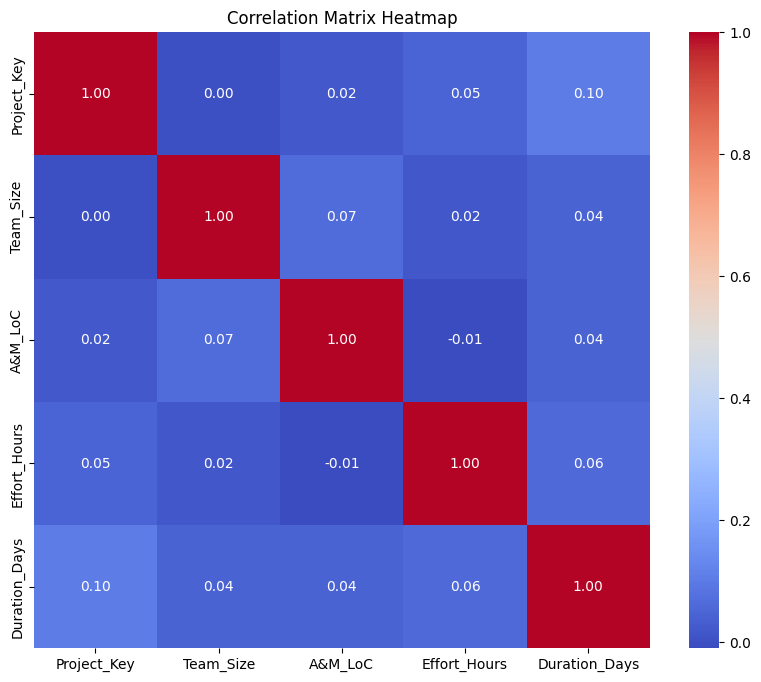


Splitting the dataset into training and testing sets...
Training Set: (400, 3), (400,)
Testing Set: (100, 3), (100,)

Training the Random Forest model...
Model training complete.

Evaluating the model...
Model Evaluation Metrics:
Mean Squared Error (MSE): 9929.053932993356
Mean Absolute Error (MAE): 84.24895591549426
R² Score: -0.03457643541239275


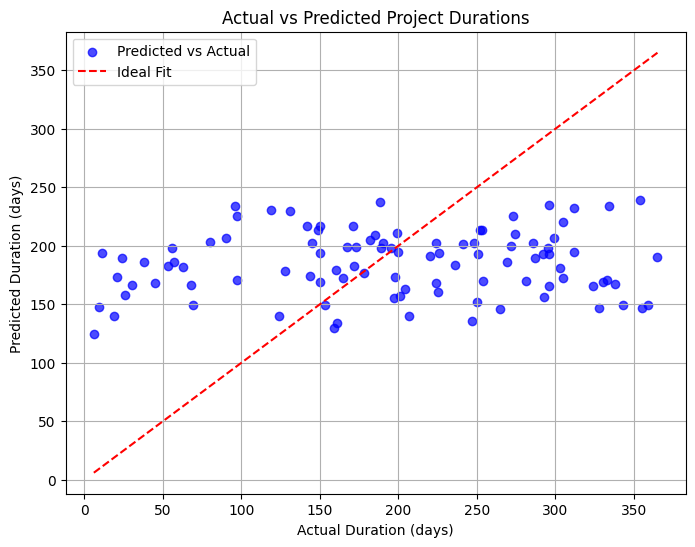


Predicting duration for a sample input...
Predicted Duration for sample input: 206.62 days
Model Accuracy: 53.64%


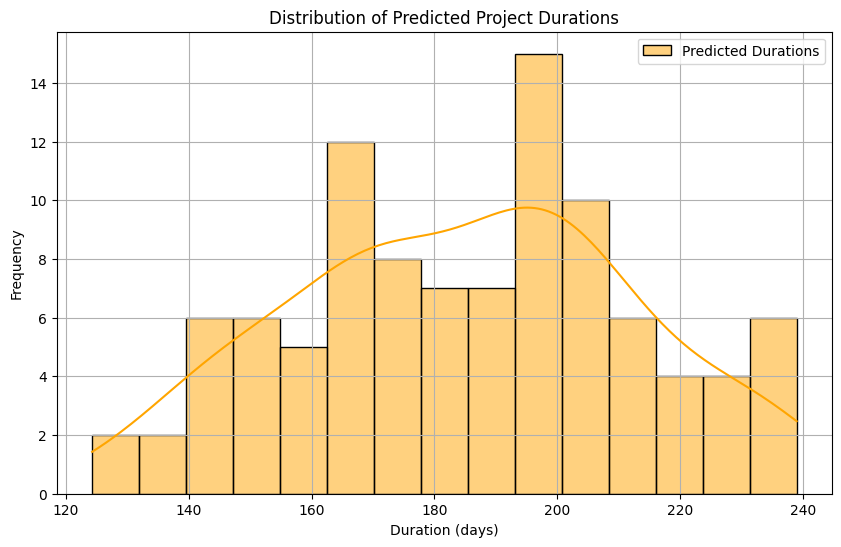

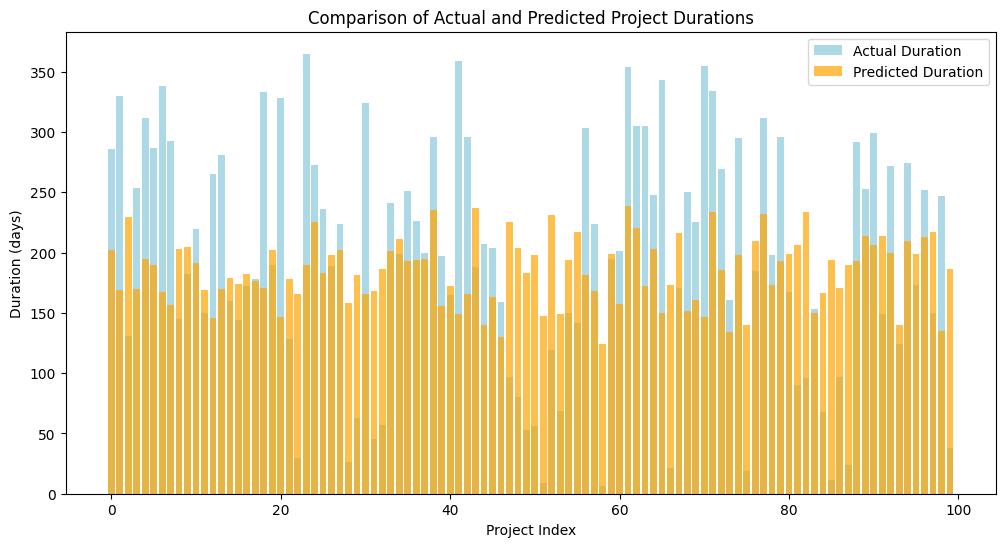

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Load the Project Summary dataset for training
file_name = "CESAW_project_summary_Cleaned.csv"  # Replace with the actual dataset filename
data = pd.read_csv(file_name)

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Step 2: Data Analysis and Preprocessing
# Analyze missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values (if any) - Example: Fill with mean
if data.isnull().values.any():
    data.fillna(data.mean(), inplace=True)
    print("\nMissing values handled by filling with column mean.")

# Perform feature analysis using correlation matrix
print("\nCorrelation Matrix:")
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Select features and target variable for project duration prediction
X = data[['Team_Size', 'A&M_LoC', 'Effort_Hours']]  # Features
y = data['Duration_Days']  # Target variable: project duration in days

# Step 3: Split the dataset
# Split the dataset into training and testing sets
print("\nSplitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display training and testing dataset sizes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

# Step 4: Model Training
# Initialize the Random Forest Regressor
print("\nTraining the Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training complete.")

# Step 5: Model Evaluation
# Predict project durations on the test set
print("\nEvaluating the model...")
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Display evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Step 6: Visualize Actual vs Predicted Values
# Scatter plot of actual vs predicted durations
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.title("Actual vs Predicted Project Durations")
plt.xlabel("Actual Duration (days)")
plt.ylabel("Predicted Duration (days)")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Predict for a Sample Input
# Test the model with a hypothetical input
print("\nPredicting duration for a sample input...")
sample_input = pd.DataFrame({
    'Team_Size': [25],
    'A&M_LoC': [200000],
    'Effort_Hours': [6000]
})
predicted_duration = rf_model.predict(sample_input)[0]
print(f"Predicted Duration for sample input: {predicted_duration:.2f} days")

# Step 8: Accuracy Calculation
# Calculate model accuracy using mean absolute error and average duration
average_duration = y.mean()
accuracy = 1 - (mae / average_duration)
print(f"Model Accuracy: {accuracy:.2%}")

# Step 9: Additional Visualization: Distribution of Predicted Durations
# Create a histogram for predicted durations
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='orange', bins=15, label='Predicted Durations')
plt.title("Distribution of Predicted Project Durations")
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Compare Actual vs Predicted Durations Using Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(y_test)), y_test, color='lightblue', label='Actual Duration')
plt.bar(range(len(y_pred)), y_pred, color='orange', alpha=0.7, label='Predicted Duration')
plt.title("Comparison of Actual and Predicted Project Durations")
plt.xlabel("Project Index")
plt.ylabel("Duration (days)")
plt.legend()
plt.show()

# Summary: This model predicts project durations using a Random Forest regressor.
# The code includes data preprocessing, feature analysis, and visualization.
